In [6]:
import pickle

pickle_in = open("X_12classes.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_12classes.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


In [7]:
X_train = X[:11785,:]
X_test = X[11785:,:]
y_train = y[:11785,:]
y_test = y[11785:,:]

print("X train shape " + str(X_train.shape))
print("X test shape " + str(X_test.shape))
print("y train shape " + str(y_train.shape))
print("y test shape " + str(y_test.shape))

X train shape (11785, 224, 224, 3)
X test shape (2498, 224, 224, 3)
y train shape (11785, 12)
y test shape (2498, 12)


In [8]:
import numpy as np
import os
import time
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input, Dropout, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from tensorflow.keras.callbacks import TensorBoard

In [9]:
image_input = Input(shape=(224, 224, 3))

model = InceptionV3(input_tensor=image_input, include_top=False, weights=None)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 111, 111, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 111, 111, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [10]:
last_layer = model.get_layer('mixed10').output
x = GlobalAveragePooling2D(name ="avg")(last_layer) 
#x = Flatten(name='flatten')(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x) 
x = Dense(12, activation='softmax', name='outputWildlife')(x)
WildlifeModel = Model(image_input, x)
WildlifeModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 111, 111, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 111, 111, 32) 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

conv2d_121 (Conv2D)             (None, 12, 12, 384)  995328      mixed2[0][0]                     
__________________________________________________________________________________________________
conv2d_124 (Conv2D)             (None, 12, 12, 96)   82944       activation_123[0][0]             
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 12, 12, 384)  1152        conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_normalization_124 (BatchN (None, 12, 12, 96)   288         conv2d_124[0][0]                 
__________________________________________________________________________________________________
activation_121 (Activation)     (None, 12, 12, 384)  0           batch_normalization_121[0][0]    
__________________________________________________________________________________________________
activation

In [13]:
NAME = "InceptionV3-Random{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='Network comparison-random-200-12 classes/{}'.format(NAME))

t=time.time()
WildlifeModel.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
WildlifeModel.fit(X_train, y_train, epochs = 200, batch_size = 16, validation_data=(X_test, y_test), callbacks = [tensorboard])
print('Training time: %s' % (t - time.time()))

Instructions for updating:
Use tf.cast instead.
Train on 11785 samples, validate on 2500 samples
Epoch 1/200
11785/11785 [==============================] - 138s 12ms/step - loss: 2.2023 - acc: 0.2826 - val_loss: 2.6679 - val_acc: 0.3092
Epoch 2/200
11785/11785 [==============================] - 115s 10ms/step - loss: 1.6107 - acc: 0.4506 - val_loss: 1.8025 - val_acc: 0.3876
Epoch 3/200
11785/11785 [==============================] - 113s 10ms/step - loss: 1.3208 - acc: 0.5568 - val_loss: 2.2039 - val_acc: 0.4436
Epoch 4/200
11785/11785 [==============================] - 114s 10ms/step - loss: 1.1622 - acc: 0.6115 - val_loss: 2.8706 - val_acc: 0.4448
Epoch 5/200
11785/11785 [==============================] - 115s 10ms/step - loss: 1.0078 - acc: 0.6647 - val_loss: 1.4136 - val_acc: 0.5592
Epoch 6/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.8907 - acc: 0.7021 - val_loss: 1.1210 - val_acc: 0.6448
Epoch 7/200
11785/11785 [==============================] - 116s

Epoch 57/200
11785/11785 [==============================] - 112s 10ms/step - loss: 0.0473 - acc: 0.9846 - val_loss: 0.5067 - val_acc: 0.8940
Epoch 58/200
11785/11785 [==============================] - 114s 10ms/step - loss: 0.0414 - acc: 0.9866 - val_loss: 0.4332 - val_acc: 0.9076
Epoch 59/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0501 - acc: 0.9831 - val_loss: 0.4102 - val_acc: 0.9092
Epoch 60/200
11785/11785 [==============================] - 113s 10ms/step - loss: 0.0349 - acc: 0.9887 - val_loss: 0.5333 - val_acc: 0.8872
Epoch 61/200
11785/11785 [==============================] - 113s 10ms/step - loss: 0.0403 - acc: 0.9863 - val_loss: 0.7583 - val_acc: 0.8500
Epoch 62/200
11785/11785 [==============================] - 114s 10ms/step - loss: 0.0423 - acc: 0.9865 - val_loss: 0.5086 - val_acc: 0.8956
Epoch 63/200
11785/11785 [==============================] - 114s 10ms/step - loss: 0.0478 - acc: 0.9846 - val_loss: 0.4848 - val_acc: 0.9012
Epoch 64/200


Epoch 115/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0107 - acc: 0.9964 - val_loss: 0.5063 - val_acc: 0.9176
Epoch 116/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0293 - acc: 0.9906 - val_loss: 0.5603 - val_acc: 0.8904
Epoch 117/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.5071 - val_acc: 0.9172
Epoch 118/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0165 - acc: 0.9951 - val_loss: 0.5139 - val_acc: 0.9088
Epoch 119/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0249 - acc: 0.9930 - val_loss: 0.5284 - val_acc: 0.9072
Epoch 120/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0207 - acc: 0.9934 - val_loss: 0.4943 - val_acc: 0.9248
Epoch 121/200
11785/11785 [==============================] - 115s 10ms/step - loss: 0.0165 - acc: 0.9953 - val_loss: 0.5901 - val_acc: 0.8988
Epoch 

In [14]:
preds = WildlifeModel.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2500/2500 [==============================] - 7s 3ms/step
Loss = 0.5519201297778636
Test Accuracy = 0.9148


In [ ]:
WildlifeModel.save('TransferLearning-Inception-new.h5')  # creates a HDF5 file 'my_model.h5'

In [1]:
from keras.models import load_model
import numpy as np
import cv2
import scipy.misc
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
WildlifeModel = load_model('TransferLearning-Inception-new.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


[[0.    0.    0.    0.    0.301 0.    0.    0.    0.    0.    0.    0.698]]


E:\Program\Anaconda-Python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


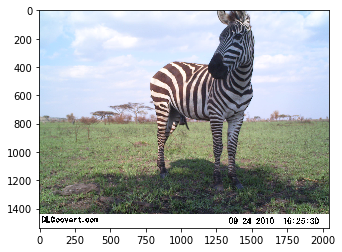

In [3]:
img_path = 'Animal Test - Large set/zebra/ASG0002le6.jpg'
img_array = cv2.imread(img_path)
new_array = cv2.resize(img_array, (224, 224))
#print(new_array)
x = np.array(new_array).reshape(-1, 224, 224, 3)
x = x/255.0
print(np.around(WildlifeModel.predict(x), decimals=3))
my_image = scipy.misc.imread(img_path)
imshow(my_image)